In [1]:
cd /content/drive/My Drive/FireFriday

/content/drive/My Drive/FireFriday


In [0]:
import pandas as pd
import numpy as np

In [3]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 501kB 35.7MB/s 
     |████████████████████████████████| 4.3MB 34.7MB/s 


In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
X_test = test.iloc[:,1:].values

In [0]:
X = X / 255
X_test = X_test / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2018)

In [11]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


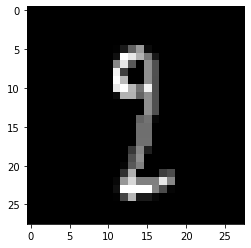

In [12]:
import matplotlib.pyplot as plt
idx = 1000
plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")

In [13]:
import tensorflow as tf
num_classes = 10
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256, activation="selu"),
  tf.keras.layers.Dense(num_classes, activation="softmax"),
])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=e9fd1288a27aca3c376762ed57186c34444257a4cfd028189a5826982270b102
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
class myAccuracy(tf.keras.metrics.Accuracy):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true,1)
        y_pred = tf.argmax(y_pred,1)
        return super(myAccuracy,self).update_state(y_true,y_pred,sample_weight)

In [0]:
from keras_radam.training import RAdamOptimizer
model.compile(optimizer=RAdamOptimizer(), loss="sparse_categorical_crossentropy", metrics=[myAccuracy()])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3

In [35]:
history = model.fit(x_train, y_train, 
                    batch_size=512, epochs=20, 
                    validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 2s 46us/sample - loss: 0.0268 - accuracy: 0.0994 - val_loss: 0.0894 - val_accuracy: 0.0996
Epoch 2/20
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0249 - accuracy: 0.1002 - val_loss: 0.0898 - val_accuracy: 0.0999
Epoch 3/20
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0259 - accuracy: 0.0998 - val_loss: 0.0895 - val_accuracy: 0.0999
Epoch 4/20
33600/33600 [==============================] - 1s 25us/sample - loss: 0.0242 - accuracy: 0.0996 - val_loss: 0.0965 - val_accuracy: 0.0993
Epoch 5/20
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0261 - accuracy: 0.1001 - val_loss: 0.0932 - val_accuracy: 0.0996
Epoch 6/20
33600/33600 [==============================] - 1s 26us/sample - loss: 0.0248 - accuracy: 0.0999 - val_loss: 0.0931 - val_accuracy: 0.0996
Epoch 7/20
33600/33600 [==============================] -

In [0]:
predictions = model.predict_classes(X_test)

In [19]:
predictions

array([8, 0, 5, ..., 3, 4, 1])

In [20]:
sample_submission.head()

,Id,Category
0,57808,0
1,4960,0
2,35755,0
3,15543,0
4,48968,0


In [21]:
sample_submission["Category"] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("radam_submission.csv", index=False)

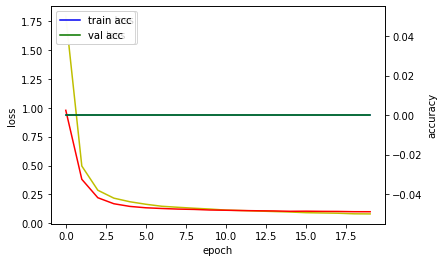

In [23]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()